## Import Library

In [18]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout

## Define Variables

In [2]:
PATH_INTENTS = '../data/intents.json'

## Load Data

In [3]:
with open(PATH_INTENTS) as file:
    data = json.load(file)

In [4]:
# Extract patterns and tags
patterns = []
tags = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        tags.append(intent['tag'])

# Convert to DataFrame
df = pd.DataFrame({'patterns': patterns, 'tags': tags})

# Display the DataFrame
df.head()

,patterns,tags
0,Hi,greeting
1,Hey,greeting
2,Is anyone there?,greeting
3,Hi there,greeting
4,Hello,greeting


## Data Preparation

In [5]:
# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['tags'])

# Tokenize the patterns
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['patterns'])
sequences = tokenizer.texts_to_sequences(df['patterns'])

# Pad the sequences
max_len = 20  # Adjust based on your dataset
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Display the preprocessed data
print(padded_sequences.shape)
print(labels.shape)

(232, 20)
(232,)


## Modeling

In [6]:
# Define the model
# model = Sequential()
# model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(128))
# model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(len(set(labels)), activation='softmax'))

d:\Coding\Projects\HearMePal\env\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
# model.add(Input(shape=(X.shape[1])))
# model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(set(labels)), activation="softmax"))

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Display the model summary
model.summary()
# plot_model(model, show_shapes=True)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_5           │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_6           │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_7           │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_8           │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_9           │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model
history = model.fit(padded_sequences, labels, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 321ms/step - accuracy: 0.0112 - loss: 4.8954 - val_accuracy: 0.0000e+00 - val_loss: 5.7258
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0123 - loss: 4.4639 - val_accuracy: 0.0000e+00 - val_loss: 6.2355
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0515 - loss: 4.0709 - val_accuracy: 0.0000e+00 - val_loss: 6.7206
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0628 - loss: 4.0505 - val_accuracy: 0.0000e+00 - val_loss: 6.9534
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.0814 - loss: 3.9599 - val_accuracy: 0.0000e+00 - val_loss: 7.1685
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0435 - loss: 3.9349 - val_accuracy: 0.0000e+00 - val_loss: 7.1357
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0918 - loss: 3.6369 - val_accuracy: 0.0000e+00 - val_loss: 7.1781
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1403 - loss: 3.4904 - va

## Evaluation

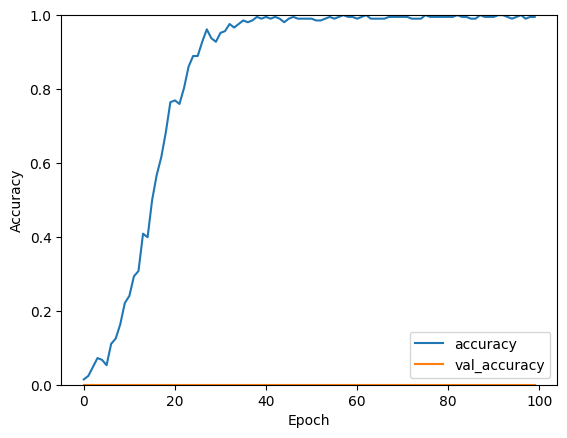

In [31]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## Prediction

In [32]:
def predict_class(text, tokenizer, model, label_encoder):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)
    tag = label_encoder.inverse_transform([np.argmax(prediction)])
    return tag[0]

def get_response(tag, data):
    for intent in data['intents']:
        if intent['tag'] == tag:
            response = np.random.choice(intent['responses'])
            return response

In [33]:
# def test_model():
#     print("Testing the model...")
#     while True:
#         text = input("You: ")
#         if text.lower() == 'exit':
#             print("Chatbot session ended.")
#             break
#         tag = predict_class(user_input, tokenizer, model, label_encoder)
#         print(f"Chatbot: {response}")


# # Call the function to test the model
# test_model()

In [34]:
# Example usage
user_input = "Hello"
predicted_tag = predict_class(user_input, tokenizer, model, label_encoder)
response = get_response(predicted_tag, data)
print(f"Bot: {response}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Bot: Hi there. What brings you here today?


In [35]:
# Example usage
user_input = "I am feeling sick today"
predicted_tag = predict_class(user_input, tokenizer, model, label_encoder)
response = get_response(predicted_tag, data)
print(f"Bot: {response}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Bot: Did something happen which made you feel this way?


In [36]:
# Example usage
user_input = "I am feeling sick today"
predicted_tag = predict_class(user_input, tokenizer, model, label_encoder)
response = get_response(predicted_tag, data)
print(f"Bot: {response}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Bot: That's geat to hear. I'm glad you're feeling this way.


In [37]:
# Example usage
user_input = "i lost my job"
predicted_tag = predict_class(user_input, tokenizer, model, label_encoder)
response = get_response(predicted_tag, data)
print(f"Bot: {response}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Bot: Hi there. How are you feeling today?
